# <span style="color:Red">Modelo Inverse Volatility</span>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

retornos = pd.read_csv('data/returns_selected.csv',index_col=0)
retornos.index.names = ['Date']
retornos.index = pd.to_datetime(retornos.index)

In [3]:
retornos.head()

,LU0272423913,LU0474536744,LU0147408487,LU1160359102,LU1160358633,IE0004866889,LU0966156712,LU1048657123,LU0966156399,IE00B03HCY54,...,IE00BLY1N519,IE00BLY27S52,LU0963986467,LU0858297186,IE00BLWF5D72,IE00BLWF5F96,IE00BHCR9339,IE00BCRY5R01,LU0858297772,LU0963987275
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,-0.014990,-0.002037,-0.015796,-0.024757,-0.024781,-0.004787,-0.012550,-0.012539,-0.012622,0.0,...,-0.001022,-0.000932,0.000582,0.000619,-0.001010,-0.001013,0.000707,0.000683,0.000507,0.000606
2016-01-07,-0.022914,-0.040227,-0.022918,-0.037041,-0.037004,-0.051189,-0.025975,-0.025978,-0.025975,0.0,...,-0.001023,-0.001222,0.001066,-0.001134,-0.002022,-0.001014,-0.001566,-0.001588,-0.001014,0.001110
2016-01-08,-0.011099,0.008457,-0.003766,-0.017866,-0.017866,0.006274,-0.014878,-0.014899,-0.014929,0.0,...,-0.001024,-0.000833,-0.001260,-0.001032,0.000000,0.000000,0.000868,0.000812,-0.001015,-0.001110
2016-01-11,-0.013483,-0.034265,-0.019048,0.000870,0.000879,-0.038846,-0.012839,-0.012888,-0.012988,0.0,...,0.001024,0.000118,0.000679,-0.000930,0.000000,0.000000,-0.001010,-0.001026,-0.001016,0.000606
2016-01-12,-0.001132,0.004348,0.005753,0.005698,0.005757,0.005135,0.003064,0.003002,0.002993,0.0,...,0.000000,-0.000168,-0.001261,-0.001241,0.000000,0.000000,-0.000453,-0.000485,-0.001221,-0.001111


In [4]:
retornos_ff = retornos.copy()

In [6]:
retornos = pd.read_csv('data/retornosYF.csv',index_col=0)
retornos.index.names = ['Date']
retornos.index = pd.to_datetime(retornos.index)

In [6]:
retornos.head()

,AAPL,DIS,MSFT,AMZN,GOOG
Date,,,,,
2016-01-05,-0.025059,-0.020198,0.004562,-0.005024,0.000998
2016-01-06,-0.019570,-0.005352,-0.018165,-0.001799,0.001400
2016-01-07,-0.042205,-0.008569,-0.034783,-0.039058,-0.023170
2016-01-08,0.005288,-0.002512,0.003067,-0.001464,-0.016410
2016-01-11,0.016192,0.006751,-0.000574,0.017610,0.002183


In [7]:
retornos_ff = retornos.copy()

## <span style="color:white">Inverse Volatility Model</span>

In [8]:

def InverseVolatilityPortfolio(cov):
    """
    Función que asigna pesos a los activos según su matriz de varianzas-covarianzas usando 
    un modelo "Inverse Volatility"
    - INPUTS:
        · cov = matriz de varianzas-covarianzas de los activos
    - OUTPUTS:
        · pesosIVP = (array) array de pesos
    """
    
    inverseVol = 1./np.sqrt(np.diag(cov))
    inverseVolTot = inverseVol.sum()
    pesosIVP = inverseVol/inverseVolTot

    
    return pesosIVP

In [9]:
cov = retornos_ff.cov()
cov.head()

,AAPL,DIS,MSFT,AMZN,GOOG
AAPL,0.000326,0.000134,0.000215,0.000214,0.000202
DIS,0.000134,0.000319,0.000135,0.000134,0.000138
MSFT,0.000215,0.000135,0.000290,0.000236,0.000224
AMZN,0.000214,0.000134,0.000236,0.000422,0.000240
GOOG,0.000202,0.000138,0.000224,0.000240,0.000320


In [10]:
pesosIVP = InverseVolatilityPortfolio(cov)
pesosIVP

array([0.20169054, 0.20373335, 0.21384595, 0.17712882, 0.20360134])

In [11]:
pesosIVP.sum()

0.9999999999999998

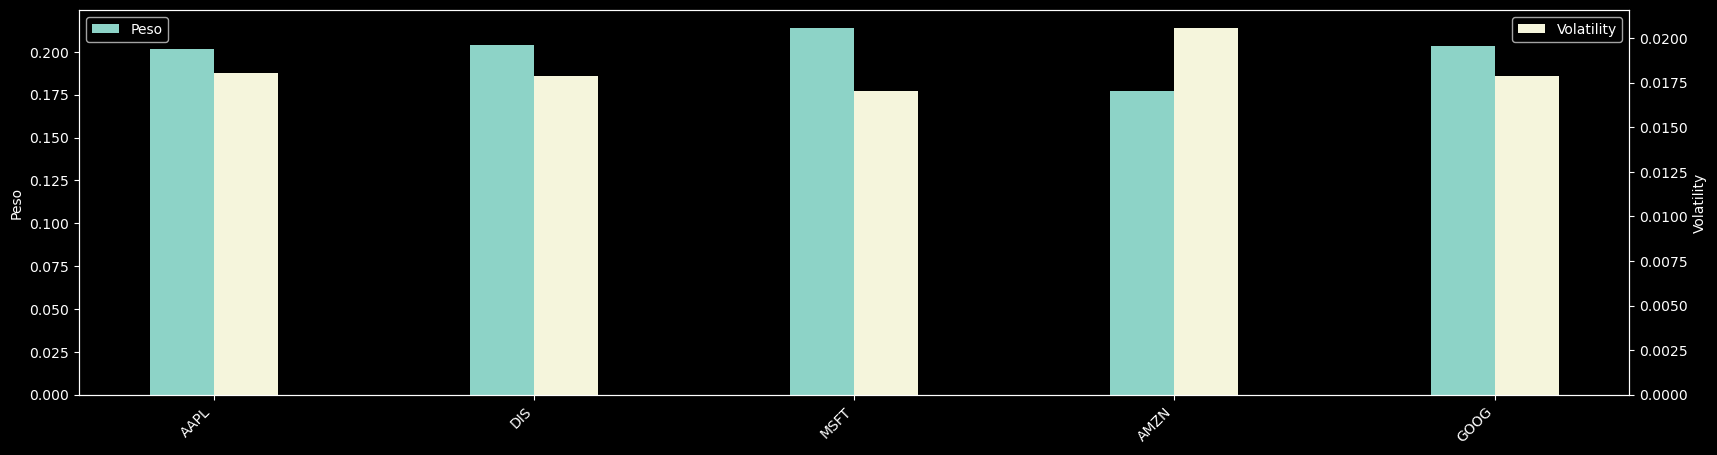

In [13]:
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.bar(x=np.arange(retornos_ff.shape[1])-0.1, height=pesosIVP, width=0.2, label='Peso')
ax1.set_xticks(np.arange(retornos_ff.shape[1]))
ax1.set_xticklabels(retornos_ff.columns, rotation=45, ha='right')
ax1.set_ylabel('Peso')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.bar(x=np.arange(retornos_ff.shape[1])+0.1, height=retornos_ff.std(), width=0.2, label='Volatility', color='beige')
ax2.set_ylabel('Volatility')
ax2.legend(loc='upper right')

plt.show()

In [14]:
varCartera = np.dot(np.dot(pesosIVP, cov),pesosIVP)
volaCartera = np.sqrt(varCartera)
print(f'La volatilidad diaria de la cartera es: {round(volaCartera*100,4)}% y anualizada: {round(volaCartera*np.sqrt(252)*100,4)}%')

La volatilidad diaria de la cartera es: 1.4675% y anualizada: 23.2952%


In [15]:

def GlobalMinimumVariance(cov):
    """
    Función que asigna pesos a los activos según su matriz de varianzas-covarianzas usando 
    el modelo de mínima varianza global
    - INPUTS:
        · cov = matriz de varianzas-covarianzas de los activos
    - OUTPUTS:
        · pesosGMVP = (array) array de pesos
    """
   
    inverseVarCovar = np.linalg.inv(cov)

    num = inverseVarCovar.sum(axis=0)

    den = inverseVarCovar.sum().sum()  

  
    pesosGMVP = num/den 

    
    return pesosGMVP

In [17]:
pesosGMVP = GlobalMinimumVariance(cov)
pesosGMVP

array([0.19506761, 0.37347526, 0.2161851 , 0.05192209, 0.16334994])

In [18]:
pesosGMVP.sum()

0.9999999999999997

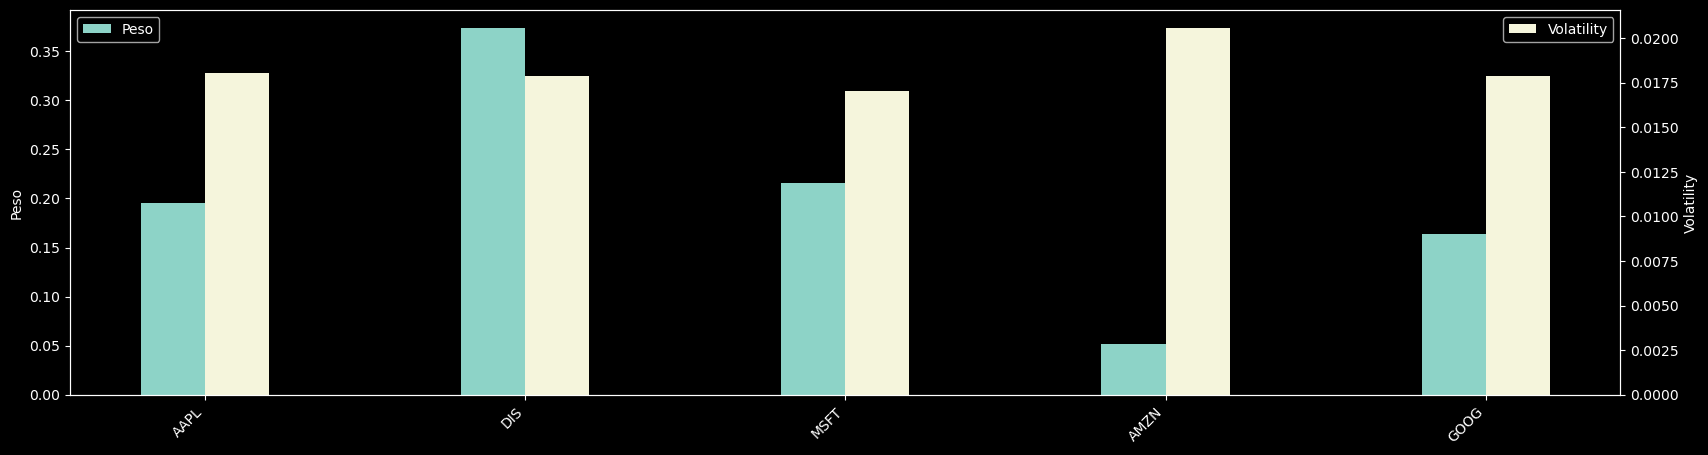

In [19]:
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(20,5))


ax1.bar(x=np.arange(retornos_ff.shape[1])-0.1, height=pesosGMVP, width=0.2, label='Peso')
ax1.set_xticks(np.arange(retornos_ff.shape[1]))
ax1.set_xticklabels(retornos_ff.columns, rotation=45, ha='right')
ax1.set_ylabel('Peso')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.bar(x=np.arange(retornos_ff.shape[1])+0.1, height=retornos_ff.std(), width=0.2, label='Volatility', color='beige')
ax2.set_ylabel('Volatility')
ax2.legend(loc='upper right')

plt.show()

In [20]:
varCartera = np.dot(np.dot(pesosGMVP, cov),pesosGMVP)
volaCartera = np.sqrt(varCartera)
print(f'La volatilidad diaria de la cartera es: {round(volaCartera*100,4)}% y anualizada: {round(volaCartera*np.sqrt(252)*100,4)}%')

La volatilidad diaria de la cartera es: 1.4286% y anualizada: 22.6776%


In [21]:
corr = retornos_ff.corr()
corr.head()

,AAPL,DIS,MSFT,AMZN,GOOG
AAPL,1.000000,0.414067,0.700616,0.575858,0.626028
DIS,0.414067,1.000000,0.444970,0.365767,0.431670
MSFT,0.700616,0.444970,1.000000,0.674870,0.736193
AMZN,0.575858,0.365767,0.674870,1.000000,0.653775
GOOG,0.626028,0.431670,0.736193,0.653775,1.000000


<Axes: >

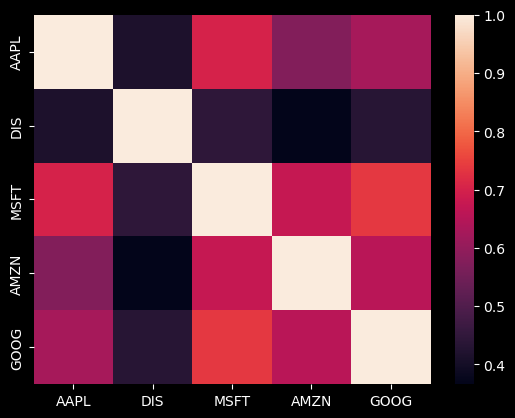

In [22]:
sns.heatmap(corr)

In [24]:
# Función para generar pesos aleatorios de tamaño de nuestro universo y 

def generaAleatorios(minimo, tamanyo):
    """
    Función que genera un array de pesos aleatorios según el tamaño
    especificado y con un mínimo
    - INPUTS:
        · minimo = peso mínimo que se quiere tener
    - OUTPUTS:
        · pesosAleat = (array) array de pesos    
    """
    aleat = np.random.rand(tamanyo)
    aleatMod = (aleat / aleat.sum() * (1 - minimo * tamanyo))
    pesosAleat = aleatMod + minimo
    return pesosAleat

In [ ]:

def inverseVolatilityRB(cov, riskBudget):
    """
    Función que asigna pesos a los activos según su matriz de varianzas-covarianzas usando 
    un modelo "Inverse Volatility" y con un cierto presupuesto de riesgo por activo
    - INPUTS:
        · cov = matriz de varianzas-covarianzas de los activos
        · riskBudget = (array) array de presupuestos de riesgo
    - OUTPUTS:
        · pesosIVRB = (array) array de pesos
    """
    inverseVolRB = np.sqrt(riskBudget) / np.sqrt(np.diag(cov))
    inverseVolTotRB = inverseVolRB.sum()
    pesosIVRB = inverseVolRB/inverseVolTotRB


    return pesosIVRB    

In [26]:
minimo = 0.01
riskBudget = generaAleatorios(minimo, retornos_ff.shape[1])
riskBudget

array([0.32222633, 0.27477288, 0.12569281, 0.08064889, 0.19665908])

In [27]:
# Pesos
pesosIVRB = inverseVolatilityRB(cov, riskBudget)
pesosIVRB

array([0.26157615, 0.24399513, 0.17321613, 0.11492659, 0.20628599])

In [28]:
pesosIVRB.sum()

1.0

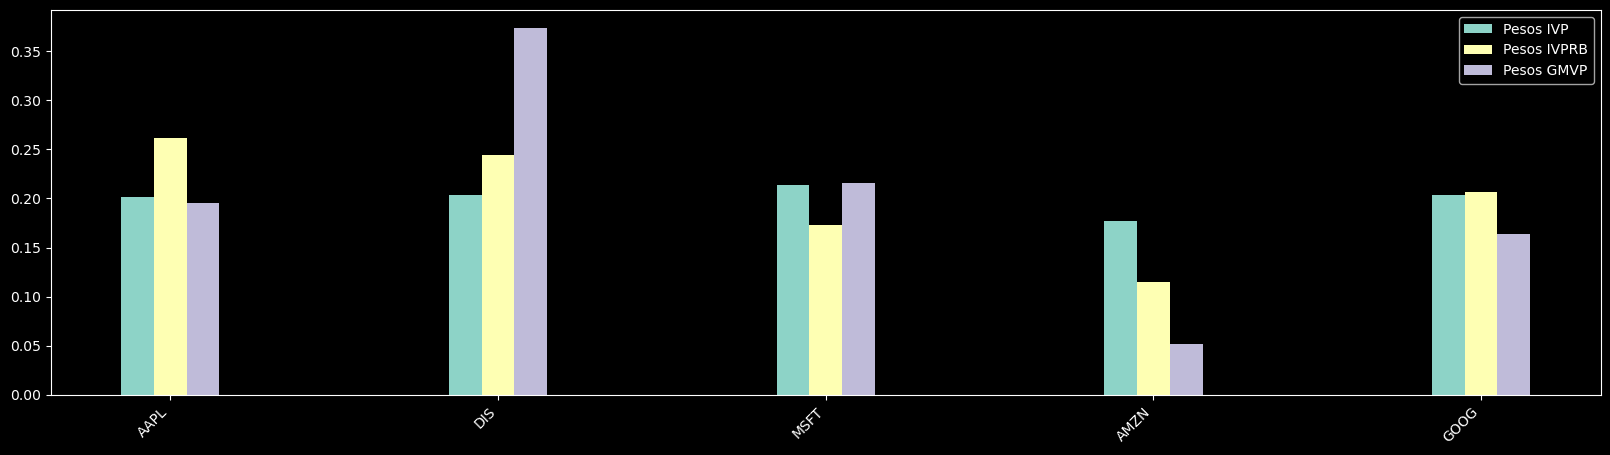

In [29]:

plt.style.use('dark_background')
plt.figure(figsize=(20,5))
plt.bar(x=np.arange(retornos_ff.shape[1])-0.1,height=pesosIVP, width=0.1, label='Pesos IVP')
plt.bar(x=np.arange(retornos_ff.shape[1]),height=pesosIVRB,width=0.1, label='Pesos IVPRB')
plt.bar(x=np.arange(retornos_ff.shape[1])+0.1,height=pesosGMVP,width=0.1, label='Pesos GMVP')
plt.xticks(np.arange(retornos_ff.shape[1]), retornos_ff.columns, rotation=45, ha='right')
plt.legend()
plt.show()